# COVID-19 Patient Prediction from Pre-conditions

Authors: Rohith Kumar Sajja, Ryan Patrick Chellman, Shinjni Maheswari, Tanvi Jadhav

## Data Source: Kaggle
Link: [COVID-19 Patient Pre-consitions dataset](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset)

Table of Contents:


1.   Statistical Analysis
2.   Pre-processing
3.   Feature Engineering
4.   Model Selection



In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt  
import seaborn as sns
import sweetviz as sv
import yellowbrick as yb
from joblib import dump, load

In [2]:
from IPython.display import display, HTML

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  white solid !important;
  color: white !important;
  text-align: center !important;
}
</style>

In [4]:
df = pd.read_csv('Data/covid.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [6]:
df.head(10)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [7]:
df.describe(include='all')

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602,566602.000000,566602.000000,566602,566602,566602,566602.000000,566602.000000,566602.000000,566602.000000,...,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
unique,563201,NaN,NaN,181,181,124,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0.00E+00,NaN,NaN,15-06-2020,01-06-2020,9999-99-99,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,210,NaN,NaN,13261,13860,530426,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.506726,1.215165,NaN,NaN,NaN,76.562952,1.846262,42.622483,50.400692,...,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,NaN,0.499955,0.410937,NaN,NaN,NaN,39.058676,0.560939,16.659973,47.501579,...,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,1.000000,1.000000,NaN,NaN,NaN,97.000000,2.000000,31.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,97.000000,2.000000,41.000000,97.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,NaN,2.000000,1.000000,NaN,NaN,NaN,97.000000,2.000000,53.000000,97.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000


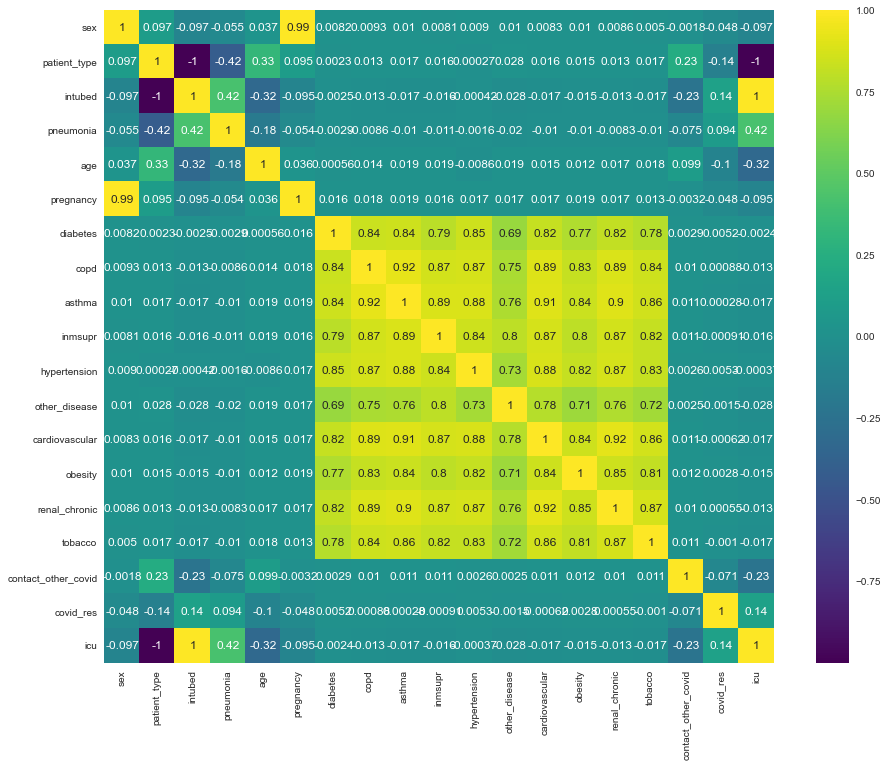

In [8]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [9]:
df = df.drop(['id', 'intubed', 'inmsupr', 'copd'], axis=1)

In [10]:
cols_na = [
    "pneumonia",
    "diabetes",
    "asthma",
    "hypertension",
    "other_disease",
    "cardiovascular",
    "obesity",
    "renal_chronic",
    "contact_other_covid",
    "tobacco",
    "sex",
    "covid_res"
]

In [11]:
covid = df

for col in cols_na:
    covid = covid.loc[(df[col] == 1) | (df[col] == 2)]

# covid = covid.loc[df["date_died"] != '9999-99-99']

# covid = covid.sample(n=77000, random_state=42)

In [12]:
for col in cols_na:
    covid[col] = covid[col].apply(lambda x: 0 if x == 2 else 1)

In [13]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343841 entries, 0 to 499690
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   sex                  343841 non-null  int64 
 1   patient_type         343841 non-null  int64 
 2   entry_date           343841 non-null  object
 3   date_symptoms        343841 non-null  object
 4   date_died            343841 non-null  object
 5   pneumonia            343841 non-null  int64 
 6   age                  343841 non-null  int64 
 7   pregnancy            343841 non-null  int64 
 8   diabetes             343841 non-null  int64 
 9   asthma               343841 non-null  int64 
 10  hypertension         343841 non-null  int64 
 11  other_disease        343841 non-null  int64 
 12  cardiovascular       343841 non-null  int64 
 13  obesity              343841 non-null  int64 
 14  renal_chronic        343841 non-null  int64 
 15  tobacco              343841 non-nu

In [14]:
# import datetime
# from dateutil.relativedelta import relativedelta
# from datetime import date

# dates = ['entry_date', 'date_symptoms', 'date_died']

# for date in dates:
#     covid[date] = pd.to_datetime(covid[date], dayfirst=True) 

# covid['diff_entry_died'] = covid['date_died'] - covid['entry_date']
# covid['diff_symptoms_died'] = covid['date_died'] - covid['date_symptoms']

In [15]:
covid = covid.drop(['entry_date', 'date_symptoms', 'date_died', 'other_disease', 'icu'], axis=1)

# date_diffs = ['diff_entry_died', 'diff_symptoms_died']

# for diff in date_diffs:
#     covid[diff] = pd.to_numeric(covid[diff])

covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343841 entries, 0 to 499690
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   sex                  343841 non-null  int64
 1   patient_type         343841 non-null  int64
 2   pneumonia            343841 non-null  int64
 3   age                  343841 non-null  int64
 4   pregnancy            343841 non-null  int64
 5   diabetes             343841 non-null  int64
 6   asthma               343841 non-null  int64
 7   hypertension         343841 non-null  int64
 8   cardiovascular       343841 non-null  int64
 9   obesity              343841 non-null  int64
 10  renal_chronic        343841 non-null  int64
 11  tobacco              343841 non-null  int64
 12  contact_other_covid  343841 non-null  int64
 13  covid_res            343841 non-null  int64
dtypes: int64(14)
memory usage: 39.3 MB


eda_report = sv.analyze([covid, "COVID-19 Pre-conditions"], "covid_res", None, 'auto')
eda_report_html = eda_report.show_html('reports/Preconditions_EDA.html')

from IPython.display import IFrame

IFrame(src='./reports/Preconditions_EDA.html', width=1500, height=1000)

In [16]:
# x = covid.drop("covid_res", axis=1)

X = covid.drop("covid_res", axis=1)
y = covid["covid_res"]

In [17]:
# columns = x.columns

# scaler = StandardScaler()
# scaler = scaler.fit(x)
# X = scaler.transform(x)
# features = pd.DataFrame(X, columns = columns)
# dump(scaler, './models/scaler.joblib')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

XGBoost 
 
 Confusion Matrix: 



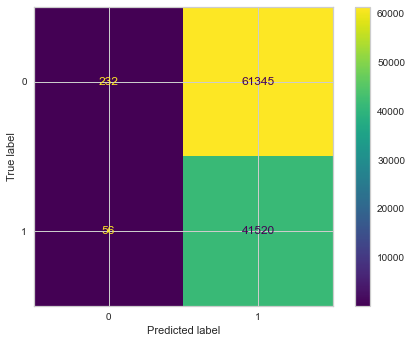

,Score
Accuracy,0.404758
Precision,0.403636
Recall,0.998653
F-score,0.574906
ROC AUC,0.501210
PR AUC,0.701416


In [20]:
xg = xgb.XGBClassifier(random_state=42, learning_rate=0.2, max_depth=8, eta=0.1, scale_pos_weight=10,            colsample_bytree=0.5,
 gamma=0.2,
 min_child_weight=1
)
xg.fit(X_train,y_train)
xg_predictions = xg.predict(X_test)
xg_confusion = confusion_matrix(y_test, xg_predictions)
xg_accuracy = accuracy_score(y_test, xg_predictions)
xg_recall = recall_score(y_test, xg_predictions)
xg_precision = precision_score(y_test, xg_predictions)
xg_f1 = f1_score(y_test, xg_predictions)
xg_roc_auc = roc_auc_score(y_test, xg_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, xg_predictions)
xg_pr_auc = auc(recall, precision)

print("XGBoost \n \n Confusion Matrix: \n")
xg_conf = plot_confusion_matrix(xg, X_test, y_test, values_format = '.0f')
plt.show()

xg_scores = pd.DataFrame({'Score': [xg_accuracy, xg_precision, xg_recall, xg_f1, xg_roc_auc, xg_pr_auc]})
xg_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
dump(xg, './models/xgb.joblib')
xg_scores

RandomForest 
 
 Confusion Matrix: 



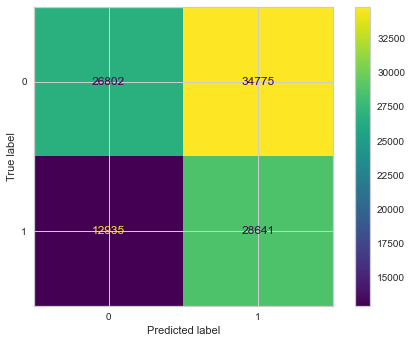

,Score
Accuracy,0.537483
Precision,0.451637
Recall,0.688883
F-score,0.545584
ROC AUC,0.562071
PR AUC,0.632958


In [21]:
rf = RandomForestClassifier(bootstrap=True, max_depth=30, max_features='sqrt', random_state=42, n_estimators=800,class_weight={0:1,1:2}, min_samples_split=5, min_samples_leaf=1)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_confusion = confusion_matrix(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, rf_predictions)
rf_pr_auc = auc(recall, precision)

print("RandomForest \n \n Confusion Matrix: \n")
rf_conf = plot_confusion_matrix(rf, X_test, y_test, values_format = '.0f')
plt.show()

# feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',                                                                 ascending=False)
# print(feature_importances)

rf_scores = pd.DataFrame({'Score': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc, rf_pr_auc]})
rf_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
dump(rf, './models/rf.joblib')
rf_scores

Multi Layer Perception (MLP) 
 
 Confusion Matrix: 



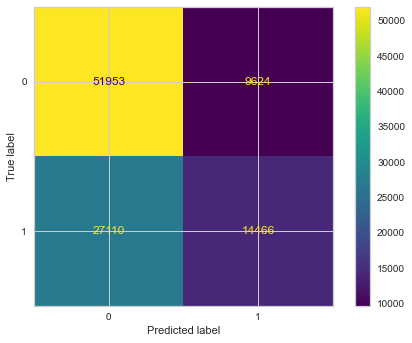

,Score
Accuracy,0.643888
Precision,0.600498
Recall,0.347941
F-score,0.440593
ROC AUC,0.595824
PR AUC,0.605626


In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=5, activation = 'relu',solver='adam')
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)
mlp_confusion = confusion_matrix(y_test, mlp_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_precision = precision_score(y_test, mlp_predictions)
mlp_recall = recall_score(y_test, mlp_predictions)  
precision, recall, thresholds = precision_recall_curve(y_test, mlp_predictions)
mlp_f1 = f1_score(y_test, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test, mlp_predictions)

mlp_f1 = f1_score(y_test, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test, mlp_predictions)
mlp_pr_auc = auc(recall, precision)

print("Multi Layer Perception (MLP) \n \n Confusion Matrix: \n")
mlp_conf = plot_confusion_matrix(mlp, X_test, y_test, values_format = '.0f')
plt.show()

mlp_scores = pd.DataFrame({'Score': [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_roc_auc, mlp_pr_auc]})
mlp_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
dump(mlp, "./models/mlp.joblib")
mlp_scores

knn = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree', leaf_size=10, p=1) 
knn.fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)
knn_confusion = confusion_matrix(y_test, knn_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, knn_predictions)

print("K Nearest Neighbor (KNN) \n \n Confusion Matrix: \n")
knn_conf = plot_confusion_matrix(knn, X_test, y_test, values_format = '.0f')
plt.show()
knn_pr_auc = auc(recall, precision)

knn_scores = pd.DataFrame({'Score': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc, knn_pr_auc]})
knn_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
dump(knn, './models/knn.joblib')
knn_scores

In [23]:
model_scores = pd.DataFrame({'Model': ['XGBoost', 'RandomForest', 'Multi Layer Perception (MLP)'],'Accuracy': [xg_accuracy, rf_accuracy, mlp_accuracy], 'Precision': [xg_precision, rf_precision, mlp_precision], 'Recall': [xg_recall, rf_recall,  mlp_recall], 'F1': [xg_f1, rf_f1, mlp_f1], 'ROC AUC': [xg_roc_auc, rf_roc_auc, mlp_roc_auc], 'Precision-Recall AUC': [xg_pr_auc, rf_pr_auc, mlp_pr_auc]})
model_scores.index = np.arange(1, len(model_scores)+1)
model_scores

,Model,Accuracy,Precision,Recall,F1,ROC AUC,Precision-Recall AUC
1,XGBoost,0.404758,0.403636,0.998653,0.574906,0.501210,0.701416
2,RandomForest,0.537483,0.451637,0.688883,0.545584,0.562071,0.632958
3,Multi Layer Perception (MLP),0.643888,0.600498,0.347941,0.440593,0.595824,0.605626


train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_test_report = sv.compare([train_df, "Training Data"], [test_df, "Test Data"], "covid_res", None, 'auto')
train_test_report_html = train_test_report.show_html('Preconditions_Train_Test.html')

IFrame(src='./Preconditions_Train_Test.html', width=1500, height=1000)

## Hyper-parameter Tuning

from pprint import pprint

print('Parameters currently in use:\n')
pprint(xgget_params())

from sklearn.model_selection import RandomizedSearchCV

random_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

pprint(random_grid)

rf_random = RandomizedSearchCV(estimator = xg, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train, y_train)

rf_random.best_params_

from sklearn.model_selection import GridSearchCV

param_grid = {"learning_rate"    : [0.10, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [  5, 6, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5],
 "gamma"            : [ 0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.4, 0.5 , 0.7 ] 
}

grid_search = GridSearchCV(estimator = xg, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

In [24]:
metrics = {'accuracy':'Accuracy', 'precision':'Precision', 'recall':'Recall', 'f1':'F1', 'rocauc':'ROC AUC', 'prauc':'Precision-Recall AUC'}

def best_model(model_scores, metric):
    max = 0
    model = ''
    for score in model_scores[metric]:
        if score > max:
            max = score
            # best_model = model_scores['Model'].iloc(score)
            model = model_scores['Model'].loc[model_scores[metric] == score]
    return model

metric = 'Precision-Recall AUC'

dump(best_model(model_scores, metric), './models/best_model.joblib')

# if best_model == 'XGBoost':
#     dump(best_model_selected, './models/model.joblib')
# elif best_model == 'RandomForest':
#     best_model_selected = rf
# elif best_model == 'K Nearest Neighbor (KNN)':
#     best_model_selected = knn
# elif best_model == 'Multi Layer Perception (MLP)':
#     best_model_selected = mlp

dump(metric, './models/metric.joblib')

['./models/metric.joblib']

In [34]:
import joblib

def load(best_model):
    # sc = joblib.load(scaler_path)
    model = joblib.load(best_model)
    return model

def covidrisk(row, model, feat_cols):
    df = pd.DataFrame([row], columns = feat_cols)
    features = pd.DataFrame(df, columns = feat_cols)
    if (model.predict(features)==0):
        return "Low chances of contracting COVID-19"
    elif (model.predict(features)==1):
        return "High risk of contracting COVID-19"


gender_select = ['Male', 'Female']
tf = {True: 1, False: 0}
patient_types = ["In-patient", "Out-patient"]


age = 77
sex = 'Male'
gender_bool = 0
if sex == 'Female':
    gender_bool = 1
elif sex == 'Male':
    gender_bool = 0
if sex == 'Female':
    pregnancy = 1
else:
    pregnancy = 97
patient_type = 'Out-patient'
patient_type_bool = 0
if patient_type == "Out-patient":
    patient_type_bool = 1
elif patient_type == "In-patient":
    patient_type_bool = 0



'''

age=23
sex='Male'
pregnancy=97
patient_type='Out-patient'


asthma=1
pneumonia=1
obesity=1
HIGH

asthma=1
penumonia=1
LOW
'''

asthma = 0
pneumonia = 0
obesity = 0
diabetes = 0
hypertension = 0
tobacco = 0
cardiovascular = 0
renal_chronic = 0
contact_other_covid = 0


row = [gender_bool, patient_type_bool, pneumonia, age, pregnancy, diabetes, asthma, hypertension, cardiovascular, obesity, renal_chronic, tobacco, contact_other_covid]


# feat_cols = ['pneumonia', 'age', 'patient_type', 'obesity', 'diabetes', 'contact_other_covid', 'pregnancy', 
# 'hypertension', 'tobacco', 'sex', 'cardiovascular', 'renal_chronic', 'asthma']

feat_cols = ['sex', 'patient_type', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'asthma', 'hypertension', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid']
model = load('models/mlp.joblib')
result = covidrisk(row, model, feat_cols)
print(result)


Low chances of contracting COVID-19
